In [1]:
from google.colab import drive 
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [43]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#read dataset
titanic_df = pd.read_csv('/content/gdrive/My Drive/titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#correlation matrix of given data
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [73]:
#encode columns with type str to type int
from sklearn.preprocessing import LabelEncoder

#Since correlation cannot be calculated when the column values are str type, we encode them with numbers
lb_make = LabelEncoder()
titanic_df["Sex_Encoded"] = lb_make.fit_transform(titanic_df["Sex"])
titanic_df["Sex_Encoded"].value_counts()

1    577
0    314
Name: Sex_Encoded, dtype: int64

In [72]:
#Calculate Correlation between Survived and Encoded values of Column Sex
corr_Val = titanic_df["Survived"].corr(titanic_df["Sex_Encoded"])
print("Correlation between Survived and Sex Coulumn:",corr_Val)

Correlation between Survived and Sex Coulumn: -0.5433513806577555


In [93]:
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Encoded,Embarked_Encoded
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,0.042939,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351,-0.163517
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900,0.157112
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153,-0.022239
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631,0.066654
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489,0.038322
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333,-0.221226
Sex_Encoded,0.042939,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000,0.104057
Embarked_Encoded,0.013083,-0.163517,0.157112,-0.022239,0.066654,0.038322,-0.221226,0.104057,1.000000


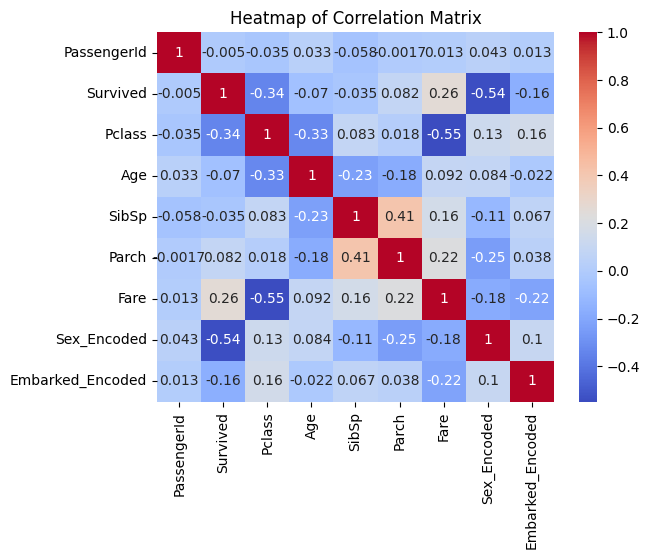

In [127]:
sns.heatmap(titanic_df.corr(), cmap='coolwarm', annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

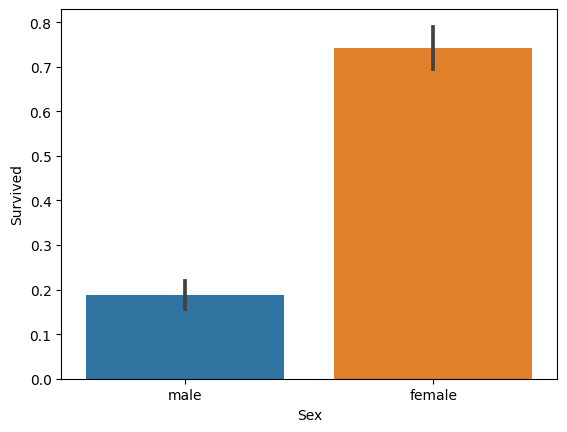

In [88]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

As the survival rate of women in more compared to men, and also more men died comapred to women. Hence we can keep this feature

In [126]:
#Find how many men and women survived and died
a = titanic_df[titanic_df['Survived'] == 0]
m0 = a[a['Sex'] == "male"]
f0 = a[a['Sex'] == "female"]
print("No. of Male Died:",m0["Sex"].count())
print("No. of Female Died:",f0["Sex"].count())

a = titanic_df[titanic_df['Survived'] == 1]
m1 = a[a['Sex'] == "male"]
f1 = a[a['Sex'] == "female"]
print("\nNo. of Male Survived:",m1["Sex"].count())
print("No. of Female Survived:",f1["Sex"].count())

No. of Male Died: 468
No. of Female Died: 81

No. of Male Survived: 109
No. of Female Survived: 233


In [80]:
#Since model cannot be trained when the column values are str type, we encode them with type int
lb_make = LabelEncoder()
titanic_df["Embarked_Encoded"] = lb_make.fit_transform(titanic_df["Embarked"])
titanic_df["Embarked_Encoded"].value_counts()

2    644
0    168
1     77
3      2
Name: Embarked_Encoded, dtype: int64

In [81]:
#checking for null values
titanic_df.isnull().any()

PassengerId         False
Survived            False
Pclass              False
Name                False
Sex                 False
Age                 False
SibSp               False
Parch               False
Ticket              False
Fare                False
Cabin                True
Embarked             True
Sex_Encoded         False
Embarked_Encoded    False
dtype: bool

In [82]:
#filling null values with mean
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [128]:
#dropping Name, Ticket,Cabin and Passenger ID as they more unique values which might not be necessary
#Columns Sex and Embarked are also dropped as we have the encoded columns
X = titanic_df.drop(['Survived','Name','Sex','Ticket','Cabin','Embarked','PassengerId'], axis=1)
Y = titanic_df['Survived']

#splitting the dataset into training set and testing set
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.25,random_state = 0)

In [130]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

#instantiating the Naive Bayes model and fitting it with traning set
gnb = GaussianNB()
gnb.fit(X_Train,Y_Train)

# Predicting the Test set result
Y_Pred = gnb.predict(X_Test)

#evaluating the model
print("Gaussian Naive Bayers Accuracy is:",round(accuracy_score(Y_Test,Y_Pred) * 100,2))
print("\nClassification Report:\n\n",metrics.classification_report(Y_Test,Y_Pred,zero_division=0))

Gaussian Naive Bayers Accuracy is: 78.03

Classification Report:

               precision    recall  f1-score   support

           0       0.85      0.78      0.82       139
           1       0.68      0.77      0.73        84

    accuracy                           0.78       223
   macro avg       0.77      0.78      0.77       223
weighted avg       0.79      0.78      0.78       223

              precision    recall  f1-score   support

           0       0.85      0.78      0.82       139
           1       0.68      0.77      0.73        84

    accuracy                           0.78       223
   macro avg       0.77      0.78      0.77       223
weighted avg       0.79      0.78      0.78       223

